[//]: ![](https://png.icons8.com/dusk/5x/happy.png)
# Capitec BBLB
__by Marcus Gawronsky__

![](https://pbs.twimg.com/profile_images/866053673511772160/MrljrN-y_400x400.jpg)

[//]: #![](https://png.icons8.com/cotton/3x/goal.png)
# Aims

## Accuracy
## Compatable
## Scalable

[//]: (![](https://png.icons8.com/dusk/4x/maintenance.png))
# Tools

In [1]:
from math import log, pi, cos, sin
import time
import os
import string
import dill

import pandas as pd

from sklearn.pipeline import make_pipeline, make_union

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, log_loss
from sklearn.model_selection import cross_validate, train_test_split

In [2]:
date = time.strftime("%Y%m%d")
model_name = 'FFNN_Pipeline_'

directory = "./{0}{1}".format(model_name, date)

if not os.path.exists(directory):
    os.makedirs(directory)

[//]: ![](https://png.icons8.com/dusk/4x/database.png)
# Data

In [5]:
train = pd.read_csv('./train_data.csv')
train['split'] = 'train'

test = pd.read_csv('./test_data.csv')
test['split'] = 'test'

data = pd.concat([train,test],axis=0)

In [6]:
train.amount = train.amount.astype(float)
train.description = train.description.astype(str)
train.transactionDate = pd.to_datetime(train.transactionDate)

test.amount = test.amount.astype(float)
test.description = test.description.astype(str)
test.transactionDate = pd.to_datetime(test.transactionDate)

data.amount = data.amount.astype(float)
data.description = data.description.astype(str)
data.transactionDate = pd.to_datetime(data.transactionDate)

## Heterogenous
## Similarity
## Natural Language-esque

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
label = encoder.fit_transform(data.loc[data['split']=='train',:]['category'])

time =  (data[data['split']=='train']['transactionDate'].dt.hour + data[data['split']=='train']['transactionDate'].dt.minute/60)/24
day = data[data['split']=='train']['transactionDate'].dt.weekday + time

x = day.apply(lambda x: (1+sin(x*2*pi)/7)*cos(x*2*pi/7))
y = day.apply(lambda x: (1+sin(x*2*pi)/7)*sin(x*2*pi/7))
z = time.apply(lambda x: cos(x*2*pi)/7)

import numpy as np
rand = np.random.randint(low=0, high=x.shape[0], size=1000)

In [35]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly as plty
plty.tools.set_credentials_file(username='marcussky', api_key='OTp0AS8LVcuURbqr5mTm')


trace1 = go.Scatter3d(
    x=x[rand],
    y=y[rand],
    z=z[rand],
    mode='markers',
    marker=dict(
        size=5,
        color=label[rand],
        colorscale='Viridis', 
        opacity=0.7
    ),

)
Data = [trace1]
fig3d = go.Figure(data=Data)

## Time

In [36]:
py.iplot(fig3d, filename='basic 3d')

## Amount

In [8]:
%matplotlib inline

from math import log
import matplotlib.pyplot as plt

Data = [go.Histogram(x=data.loc[
    ~(np.abs(data.amount-data.amount.mean())>(3*data.amount.std())),['amount']].apply(
    lambda x: (-x))['amount'][rand].tolist())]
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fighist = go.Figure(data=Data)

/home/marcussky/anaconda3/envs/pearl/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [9]:
py.iplot(fighist, filename='basic histogram')

## Description
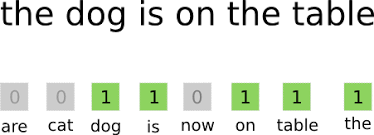

## Category

In [10]:
labels = data[data['split']=='train']['category'].value_counts().keys().tolist()
values = data[data['split']=='train']['category'].value_counts().values.tolist()

trace = go.Pie(labels=labels, values=values)

In [11]:
py.iplot([trace], filename='basic_pie_chart')

[//]: ![](https://png.icons8.com/dusk/4x/mind-map.png)
# Models

__Example Pipeline__  

pipeline = make_pipeline(  
      * make_union(  
            + make_pipeline(preprocessing.FunctionTransformer(*select_description), CountVectorizer()),  
            + make_pipeline(preprocessing.FunctionTransformer(*select_amount), RobustStandardizer()),  
            + make_pipeline(preprocessing.FunctionTransformer(*select_transactionDate.apply(lambda x: cos(x))))  
      * ),  
      * make_pipeline(),
      
    *MLPClassifier()  
)  

__Example Grid__  

from sklearn.linear_model import LogisticRegression  
params = dict(reduce_dim=[None, PCA(5), PCA(10)])  
grid_search = GridSearchCV(pipe.named_steps.makepipeline, param_grid=params)  

[//]: ![](https://png.icons8.com/dusk/2x/combo-chart.png)
##  Network Models

In [8]:
encoder = preprocessing.LabelBinarizer()
encoded_y_train = encoder.fit_transform(train['category'])
encoder.classes_

array(['Clothing', 'Eat_Out', 'Education', 'Entertainment',
       'Gifts_Donations', 'Groceries', 'Health_Fitness', 'Holiday_Travel',
       'Home', 'Medical', 'Pets', 'Transport'],
      dtype='<U15')

In [10]:
table = str.maketrans({key: None for key in string.punctuation+'0123456789'})

In [65]:
pipeline = make_pipeline(
    
    make_union(
        # Description
        make_pipeline(
            preprocessing.FunctionTransformer(lambda x: x['description'].apply(lambda x: x.lower().translate(table)), validate=False),
            make_union(
                make_pipeline(
                    CountVectorizer(strip_accents='ascii', analyzer='char', lowercase=True),
                    TfidfTransformer(),
                ),
                make_pipeline(
                    CountVectorizer(strip_accents='unicode', analyzer='word',  max_df=0.999,min_df=0.001),
                    TfidfTransformer(),
                ),
                n_jobs=-1
            )

        ),
        make_pipeline(
            make_union(
                # Amount
                make_pipeline(
                    preprocessing.FunctionTransformer(lambda x: x['amount'].apply(lambda x: log(-x+1)).values.reshape(-1,1), validate=False),
                    preprocessing.RobustScaler(),
                    preprocessing.PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
                ),

                # Codes
                make_pipeline(
                    preprocessing.FunctionTransformer(lambda x: x['code'].apply(lambda x: str(x)), validate=False),
                    CountVectorizer(),
                ),

                #time
                make_pipeline(
                preprocessing.FunctionTransformer(lambda x: (x['transactionDate'].dt.weekday + x['transactionDate'].dt.hour/24 + x['transactionDate'].dt.minute/(24*60)), validate=False),
                    make_union(
                        make_pipeline(
                            preprocessing.FunctionTransformer(lambda x: x.apply(lambda x: cos(x)).values.reshape(-1,1), validate=False),
                        ),
                        make_pipeline(
                            preprocessing.FunctionTransformer(lambda x: x.apply(lambda x: sin(x)).values.reshape(-1,1), validate=False),
                        ),
                    ),
                ),

                #day
                make_pipeline(
                preprocessing.FunctionTransformer(lambda x: (x['transactionDate'].dt.hour/24 + x['transactionDate'].dt.minute/(24*60)), validate=False),
                    make_union(
                        make_pipeline(
                            preprocessing.FunctionTransformer(lambda x: x.apply(lambda x: cos(x)/7).values.reshape(-1,1), validate=False),
                        ),
                        make_pipeline(
                            preprocessing.FunctionTransformer(lambda x: x.apply(lambda x: sin(x)/7).values.reshape(-1,1), validate=False),
                        ),
                    ),
                ),
            ),
        ),
    ),
        
    #Classifier
    MLPClassifier(hidden_layer_sizes=(50, 50, 50),activation='tanh',solver='adam', verbose=False, early_stopping=False,max_iter=10, alpha=0.0002),
)

## Multilayer Perceptron

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['category']), encoded_y_train, train_size=0.8)

/home/marcussky/anaconda3/envs/pearl/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [121]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

/home/marcussky/anaconda3/envs/pearl/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.99733014693527011

In [15]:
y_pred_proba = pipeline.predict_proba(X_test)
log_loss(y_test, y_pred_proba)

0.017639557895139955

## Data reprocessing

In [102]:
pipeline

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x7fe1491dbae8>, inv_kw_args=None,
          inverse_func=None, kw_args=None,...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [126]:
transformed_data_test = pipeline.named_steps.featureunion.transform(X_test)
inputs_shape = transformed_data.shape[1]
inputs_shape

790

### Keras FFNN Dropout Model

In [144]:
transformed_data_train = pipeline.named_steps.featureunion.transform(X_train)

In [196]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import TensorBoard, EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=inputs_shape, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='tanh'))
    model.add(Dense(12, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

In [197]:
stopping = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=1, verbose=2, mode='auto')
tensorboard = TensorBoard(log_dir='./{0}{1}/tensorboard_logs'.format(model_name,date), histogram_freq=1, batch_size=50, write_graph=True, write_grads=True)

dropout_model = KerasClassifier(build_fn=create_model, epochs=2,validation_split=0.1, shuffle=True, batch_size=32, verbose=2)

In [198]:
create_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 40)                31640     
_________________________________________________________________
dropout_37 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 30)                1230      
_________________________________________________________________
dropout_38 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_77 (Dense)             (None, 12)                372       
Total params: 34,172
Trainable params: 34,172
Non-trainable params: 0
_________________________________________________________________


In [195]:
dropout_model.fit(transformed_data_train, y_train)

Train on 192819 samples, validate on 21425 samples
Epoch 1/2
 - 57s - loss: 0.0849 - val_loss: 0.0195
Epoch 2/2
 - 56s - loss: 0.0216 - val_loss: 0.0170


[//]: ![](https://png.icons8.com/cotton/1x/tree.png)
## Tree Models

### Boosted Decision Trees

In [106]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [124]:
model.fit(transformed_data_train, encoder.inverse_transform(y_train))
model.feature_importances_[0:10]

array([ 0.00742804,  0.00519963,  0.00612813,  0.00241411,  0.00185701,
        0.00594243,  0.00222841,  0.00408542,  0.00464253,  0.00148561], dtype=float32)

In [127]:
model.score(transformed_data_test, encoder.inverse_transform(y_test))

0.99027277309983008

## Convolutional Models

### Wide and Deep Character-level CNN
![](https://raw.githubusercontent.com/pth1993/NNVLP/master/docs/cnn.png)

In [104]:
from keras.models import Model
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Input, Concatenate

In [ ]:
transformed_data = pipeline.named_steps.featureunion.transform(X)

In [ ]:
from keras.preprocessing.text import Tokenizer
X = X.astype(str)
tokenizer = Tokenizer(num_words=26, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' ', char_level=True, oov_token=None)
tokenizer.fit_on_texts(data['description'])
Deep = tokenizer.texts_to_sequences(data['description'])

from keras.preprocessing.sequence import pad_sequences
Deep = pad_sequences(Deep, maxlen=40, dtype='int32', padding='pre', truncating='pre', value=0.0)

In [ ]:
Deep0 = Input(shape=(Deep[1],Deep[2]))

Deep1 = Conv1D(filters = 30, kernel_size = 3, strides=1)(Deep0)
Deep2 = MaxPooling1D(pool_size=3)(Deep1)
Deep3 = Conv1D(filters = 30, kernel_size = 4, strides=1)(Deep2)
Deep4 = GlobalMaxPooling1D()(Deep3)

Deep5 = Dense(units = 20, activation= 'relu', kernel_initializer='he_uniform')(Deep4)
Deep6 = Dropout(rate=0.1)(Deep5)

In [ ]:
Wide0 = Input(shape=(Wide_dim,))
Wide1 = Dense(units = 15, activation= 'relu', kernel_initializer='he_uniform')(Wide0)
Wide2 = Dropout(rate=0.15)(Wide1)

In [ ]:
model0 = Concatenate(axis=-1)([Deep6, Wide2])

model1 = Dense(units = 25, activation= 'relu')(model0)
model2 = Dropout(rate=0.15)(model1)

model5 = Dense(units = Y_train.shape[1], activation= 'softmax')(model2)

model = Model(inputs=[Deep0, Wide0], outputs=model5)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=adam)

model.fit(x=[Deep, transformed_data], y=y, epochs=25, verbose=2, validation_split=0.1, shuffle=True, callbacks=[stopping])

<img src="./model.png" style="width: 50%; height: 50%"/>

# Benchmarks

## Cross Validation

In [9]:
X, y = train.drop(columns=['category']), encoded_y_train

In [18]:
scores = cross_validate(pipeline, X, y, scoring='neg_log_loss', cv=10, return_train_score=True)
cv_scores = pd.DataFrame(scores)
cv_scores

,fit_time,score_time,test_score,train_score
0,30.763757,0.930299,-0.024971,-0.010811
1,38.514634,1.063627,-0.014878,-0.011072
2,28.082782,0.945335,-0.017070,-0.014372
3,33.809651,1.022613,-0.013790,-0.012194
4,44.674286,1.277124,-0.018595,-0.010021
5,31.517745,0.933698,-0.015220,-0.013248
6,32.288925,0.955801,-0.021903,-0.011329
7,31.302816,0.948642,-0.019539,-0.014599
8,23.971651,0.926102,-0.030830,-0.015257
9,26.590147,0.928146,-0.012016,-0.015209


## Performance

In [19]:
"Mean Time: {0} | Standard Deviation: {1}".format(cv_scores.fit_time.mean(), cv_scores.fit_time.std())

'Mean Time: 32.15163931846619 | Standard Deviation: 5.939685435521175'

In [20]:
"Mean Score: {0} | Score Standard Deviation: {1}".format(cv_scores.test_score.mean(), cv_scores.test_score.std())

'Mean Score: -0.01888117405504416 | Score Standard Deviation: 0.00572771569996098'

## Classification Report

In [16]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(encoder.classes_)))

                 precision    recall  f1-score   support

       Clothing       1.00      1.00      1.00      5052
        Eat_Out       1.00      1.00      1.00      5016
      Education       1.00      1.00      1.00      4962
  Entertainment       1.00      1.00      1.00      5035
Gifts_Donations       1.00      1.00      1.00      4952
      Groceries       0.99      1.00      0.99      5020
 Health_Fitness       1.00      0.96      0.98       419
 Holiday_Travel       1.00      1.00      1.00      4968
           Home       1.00      1.00      1.00      4996
        Medical       1.00      1.00      1.00      4954
           Pets       1.00      1.00      1.00      3199
      Transport       1.00      1.00      1.00      4988

    avg / total       1.00      1.00      1.00     53561



[//]: ![](https://png.icons8.com/dusk/4x/factory.png)
# Production

## Pickle
## Online learning
## Scalable

## Speed

In [31]:
%%timeit
predictions = pipeline.predict(test)

2.88 s ± 34.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Serializing

In [25]:
with open('./{0}{1}/pipeline.pkl'.format(model_name,date), 'wb') as f:
    dill.dump(pipeline, f, dill.HIGHEST_PROTOCOL)

In [26]:
print("File Size: {0} mb".format(os.path.getsize(
        './{0}{1}/pipeline.pkl'.format(model_name,date))/1000000))

File Size: 1.774015 mb


In [27]:
with open('./{0}{1}/pipeline.pkl'.format(model_name,date), 'rb') as f:
    model = dill.load(f)

## Online-Learning

Online words with early-stopping off.  

In [58]:
all_classes = np.unique(range(0,y_test.shape[1]))
pipeline.named_steps.mlpclassifier.partial_fit(transformed_data_test, y_test, classes=all_classes)

MLPClassifier(activation='tanh', alpha=0.0002, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Flask-based REST API

In [ ]:
import numpy as np
from flask import Flask, abort, jsonify, request
import requests,json

app = Flask(__name__)

@app.route('/predict', methods=['post'])
def predict():
    json_ = request.get_json(force=True)
    query = [json_]
    return pipeline.predict(query)

if __name__ == '__main__':
    app.run(port=8080)

## Submission

In [37]:
pipeline.fit(train.drop(columns=['category']), encoded_y_train)

predictions = pipeline.predict_proba(test)
predictions = pd.DataFrame(predictions, columns=encoder.classes_)
submission = pd.concat([test['id'], predictions], axis=1)
submission.to_csv(path_or_buf='./{0}{1}/submission.csv'.format(model_name,date), sep=',', index=False)

[//]: ![](https://png.icons8.com/dusk/4x/classroom.png)
# Lessons

## Explore!
## Meta-heuristics and Meta-learning ♥
## KILL YOUR DARLINGS

[//]: ![Thanksgiving](https://png.icons8.com/cotton/3x/thanksgiving.png))
# Thanks